# Optics Main page  (v1.3d)

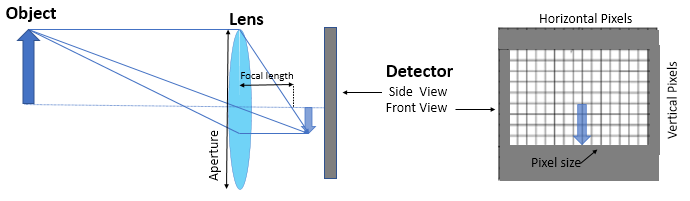

In [1]:
import math
from ipywidgets import *
import numpy as np
import matplotlib.image as mpimg
#from decimal import Decimal
#import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

pi=math.pi
img2 = mpimg.imread('optic2.PNG')
img3 = mpimg.imread('optic3.png')
img4 = mpimg.imread('optic4.png')
img5 = mpimg.imread('optic5.png')


def plot_func(wvl1,wvl2,Horz,Vert,p,EFL,Dia):
    
        #validate inputs
        skip = False        
        if wvl1 <= 0:
            skip = True
        elif wvl2<= 0:
            skip = True
        elif Horz <=0: 
            skip = True
        elif Vert <=0:
            skip = True
        elif p <=0:
            skip = True
        elif EFL <=0:
            skip = True
        elif Dia <=0:
            skip = True
        else:
            skip = False

        if skip == True:
            print ('Invalid Inputs')
            
        else:

                        
            theta = ((p*1e-6)/EFL) #ifov in radians
            flvw = Horz*theta 
            ChipW=Horz*p*1e-6 #chip width
            ChipH=Vert*p*1e-6 #chip hight
            ChipArea=ChipW*ChipH 

            afov = (180/pi)*2*np.arctan((ChipW)/(2*EFL))
            ifov = (afov*pi)/(Horz*180)
            va = ifov
            Fn=EFL/Dia 
            bs = 2.44*(wvl1+wvl2)*Fn*1e-6/2 #blur spot
            bsnp = (bs/(p*1e-6))  #blur spot number of pixels

            #defines slider operation
            print('(f/# slider sweeps Focal Length, with Apeture and Chip Width Constant)')

            CalcResults = widgets.HTML(value = "<p style='font-size:16pt'><b>Calculated Results</b></p>")
            display(CalcResults)
            print ('F/# = ',round(Fn,4),'  blur spot = %5.4e' %(bs), 'Meters which is ', round(bsnp,2) , 'pixels')  
            print ('Detector Chip width =',round(ChipW*1000,2),'mm   Chip height =',round(ChipH*1000,2),'mm  Chip Area = ',round(ChipArea*1e6,4),'mm^2')
            print ('Horizontal Field Of View:', round(afov,2),' Degrees    or: ', round(afov*pi/180,4),'Radians' )
            print ('Instantaneous  FOV:', round(afov/Horz,6),' Degrees   or: ', round(ifov,6),' Radians')
            #print ('Visual Acuity = ', 777, 'Numerical Aperture =', 777)
            #print ('paraxial=',round(theta,6)')')

            #defines slider operation
            print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   ')
            print('(f/# slider sweeps Focal Length, with Apeture and Chip Width Constant)')
            
            def slider_func(FNO):
                
                plt.style.use('classic')
                fig=plt.figure(1,figsize=(16,8));
                gs = gridspec.GridSpec(1, 2,width_ratios=[1.75,1])        
                ax1=plt.subplot(gs[1]) 
                plt.title('Blur Spot vs Pixel Size')
                plt.axis([0, 1.7, 0, 1.7])
                plt.axis('off')
                ax1.imshow(img2, extent=[0, 1.7, 0, 1.7])
                ax1.imshow(img4, extent=[0.2, 0.2 + bsnp*0.1, 1.7/2 - (bsnp*0.1)/2 , 1.7/2 + (bsnp*0.1)/2],alpha=0.75)
                plt.text(0.2,1.5,'Blur Spot = ' + str(round(bsnp,2)),color='red') 
                Bbs = 2.44*(wvl1+wvl2)*FNO*1e-6/2 #"BLUE blur spot
                Bbsnp = (Bbs/(p*1e-6))  #BLUE blur spot number of pixels
                ax1.imshow(img5, extent=[1.5-Bbsnp*0.1 , 1.5, 1.7/2 - (Bbsnp*0.1)/2 , 1.7/2 + (Bbsnp*0.1)/2],alpha=0.5)
                plt.text(1.0,1.5,'Blur Spot = ' + str(round(Bbsnp,2)),color='blue')
                plt.text(0.575,0.28,'Width = ' + str(round(ChipW*1000,2)) + '(mm)', color='black')
                plt.text(0.03,0.65,'Height = ' + str(round(ChipH*1000,2)) +'(mm)', color='black', rotation=90)

                #plt.style.use('dark_background')
                ax2=plt.subplot(gs[0])
                plt.grid(True)
                x1=[0,20]
                y1=[0,20*afov*pi/(180*2)]
                y1b=[0,-20*afov*pi/(180*2)]
                plt.axis([0, 10, -5, 5])
                plt.title('Field of View vs f/#')
                ax2.plot(x1,y1,color='red')
                ax2.plot(x1,y1b,color='red')
                plt.text(1,-3,'f/# = ' + str(round(Fn,2)) + '    H-FOV =' + str(round(afov,2)),color='red')
                plt.text(1,-3.35,'Input Values',color='red')
                y2=[0,20*np.arctan(ChipW/(FNO*2*Dia))]
                y2b=[0,-20*np.arctan(ChipW/(FNO*2*Dia))]
                ax2.plot(x1,y2,color='blue')
                ax2.plot(x1,y2b,color='blue')
                BFOV=(180/pi)*2*np.arctan(ChipW/(2*FNO*Dia))
                plt.text(1,4.05,'f/# = ' + str(round(FNO,2)) + '    H-FOV =' + str(round(BFOV,2)),color='blue')
                plt.text(1,3.7,'Slider Values',color='blue')
                plt.fill_between(x1,y2,y2b, facecolor='blue',alpha=0.4)
                ax2.imshow(img3, extent=[0, .25, -1.5, 1.5])

            interact(slider_func, FNO = widgets.FloatSlider(value=2, min=.25, max=10, step=0.25,description = 'f/# (unitless)',layout=Layout(width='550px'),continuous_update=True))

            
# Description width style
style1 = {'description_width': 'initial'} 
    
interact(plot_func, 
             wvl1 = widgets.FloatText(value=3, step=0.25, description = 'Wavelength 1 (um)',style=style1), 
             wvl2 = widgets.FloatText(value=5, step=0.25, description = 'Wavelength 2 (um)',style=style1),
             Horz = widgets.FloatText(value=1280, step=1, description = 'Horizontal Pixels (#)',style=style1),
             Vert = widgets.FloatText(value=720, step=1, description = 'Vertical Pixels (#)',style=style1),
             p = widgets.FloatText(value=20, step=1, description = 'Detector pitch (um)',style=style1),
             EFL = widgets.FloatText(value=0.10, step=0.05, description = 'Focal Length (m)',style=style1),
             Dia = widgets.FloatText(value=0.015, step=0.05, description = 'Lens Diameter/Aperture (m)',style=style1),         
             )

interactive(children=(FloatText(value=3.0, description='Wavelength 1 (um)', step=0.25, style=DescriptionStyle(…

<function __main__.plot_func(wvl1, wvl2, Horz, Vert, p, EFL, Dia)>